In [1]:
import os
path = 'D:/python_project/hyunmin_project/운동동작분류/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

train=pd.read_csv(path + 'open/train_features.csv')
train_labels=pd.read_csv(path + 'open/train_labels.csv')
test=pd.read_csv(path + 'open/test_features.csv')
submission=pd.read_csv(path + 'open/sample_submission.csv')

In [3]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [4]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [5]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


<AxesSubplot:>

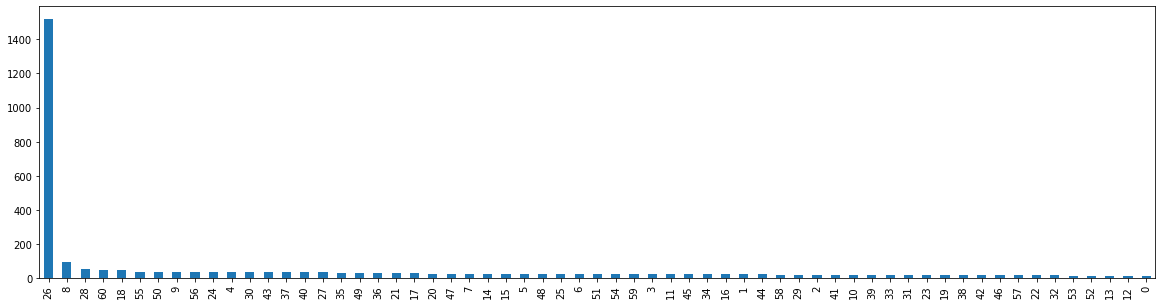

In [6]:
train_labels['label'].value_counts().plot(kind='bar', figsize=(20, 5))

In [7]:
non_ex = train_labels['id'][train_labels['label']==26]

In [8]:
# for i in non_ex:
#     ex=train[['acc_x', 'acc_z']][train['id']==i]
#     ex.plot()
#     plt.show()

In [9]:
Biceps_Curl = train_labels['id'][train_labels['label']==4]

In [10]:
# for i in Biceps_Curl:
#     ex=train[['acc_x', 'acc_y', 'acc_z']][train['id']==i]
#     ex.plot()
#     plt.show()

<AxesSubplot:>

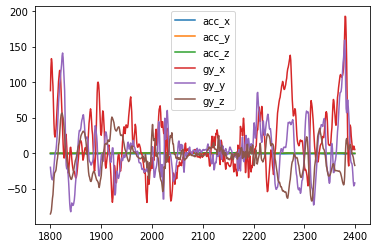

In [11]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==3]
ex.iloc[:,2:].plot()


<AxesSubplot:>

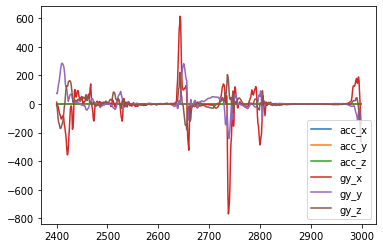

In [12]:
ex=train[train['id']==4]
ex.iloc[:,2:].plot()

In [13]:
#test'id'는 782개 
test['id'].nunique()

782

In [14]:
#782개의 id 별 동작 데이터를 활용해 각각의id가 어떤 동작인지를 분류하는 문제!!
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [16]:
train_features = pd.read_csv(path+'open/train_features.csv')
train_labels = pd.read_csv(path+'open/train_labels.csv')
test = pd.read_csv(path+'open/test_features.csv')
sample_submission = pd.read_csv(path + 'open/sample_submission.csv')

In [17]:
from tqdm import tqdm
from glob import glob

x_train = []

for uid in tqdm(train_features['id'].unique()):
    temp = np.array(train_features[train_features['id'] == uid].iloc[:,2:], np.float32).T
    x_train.append(temp)

x_train = np.array(x_train, np.float32)
x_train = x_train[:,:,:,np.newaxis]

x_test = []

for uid in tqdm(test['id'].unique()):
    temp = np.array(test[test['id'] == uid].iloc[:,2:], np.float32).T
    x_test.append(temp)

x_test = np.array(x_test, np.float32)
x_test = x_test[:,:,:,np.newaxis]

100%|████████████████████████████████████████████████████████████████████████████| 782/782 [00:00<00:00, 876.08it/s]


In [18]:
x_train.shape

(3125, 6, 600, 1)

In [19]:
train_Non_id = train_labels['id'][~train_labels['label'].isin([26])]
train_Non_id.unique()
exercise_id = list(train_Non_id.unique())
len(exercise_id)


1607

In [20]:
train_tail_id = train_labels['label'].value_counts().tail(5).keys()
print(train_tail_id)
tail_id = train_labels['id'][train_labels['label'].isin(train_tail_id)]
tail_id.unique()
tail_id = list(tail_id.unique())
len(tail_id)

Int64Index([53, 52, 13, 12, 0], dtype='int64')


61

In [21]:
train_ex = train[train['id'].isin(exercise_id)]
train_ex.shape

(964200, 8)

In [22]:
train_tail = train[train['id'].isin(tail_id)]
train_tail.shape

(36600, 8)

In [23]:
train_ex = []

for uid in tqdm(pd.DataFrame(exercise_id)[0].unique()):
    temp = np.array(train_features[train_features['id'] == uid].iloc[:,2:], np.float32).T
    train_ex.append(temp)

train_ex = np.array(train_ex, np.float32)
train_ex = train_ex[:,:,:,np.newaxis]

100%|██████████████████████████████████████████████████████████████████████████| 1607/1607 [00:04<00:00, 351.89it/s]


In [24]:
train_tail = []

for uid in tqdm(pd.DataFrame(list(tail_id))[0].unique()):
    temp = np.array(train_features[train_features['id'] == uid].iloc[:,2:], np.float32).T
    train_tail.append(temp)

train_tail = np.array(train_tail, np.float32)
train_tail = train_tail[:,:,:,np.newaxis]

100%|██████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 389.58it/s]


In [25]:
def aug(data,shift = 0):
    shift_data = np.roll(data, shift, axis=2)
    print(shift_data.shape)
    return shift_data

In [26]:
aug_data_all = []
for _ in range(1):
    data = aug(x_train, int(random.random()*600))
    aug_data_all += list(data)
np.array(aug_data_all).shape

(3125, 6, 600, 1)


(3125, 6, 600, 1)

In [58]:
aug_data_ex = []
for _ in range(3):
    data = aug(train_ex, int(random.random()*600))
    aug_data_ex += list(data)
np.array(aug_data_ex).shape

(1607, 6, 600, 1)
(1607, 6, 600, 1)
(1607, 6, 600, 1)


(4821, 6, 600, 1)

In [59]:
aug_data_tail = []
for _ in range(1):
    data = aug(train_tail, int(random.random()*600))
    aug_data_tail += list(data)
np.array(aug_data_tail).shape

(61, 6, 600, 1)


(61, 6, 600, 1)

In [60]:
train_x = np.concatenate((np.array(x_train), np.array(aug_data_ex), np.array(aug_data_tail)), axis=0)

In [61]:
X=tf.reshape(train_x,[-1, 600, 6])
X.shape

TensorShape([8007, 600, 6])

In [62]:
multi_label = []
for i in train_labels['label']:
    if i != 26:
        multi_label.append(i)

In [63]:
tail_label = []
for i in train_labels['label']:
    if i in train_tail_id:
        tail_label.append(i)
len(tail_label)

61

In [64]:
# Y_train = list(train_labels['label'])
# for i in range(3):
#     Y_train += list(train_labels['label'])
# len(Y_train)

In [65]:
Y_train = list(train_labels['label'])
for i in range(3):
    Y_train +=  multi_label
len(Y_train)

7946

In [66]:
for i in range(1):
    Y_train +=  tail_label
len(Y_train)

8007

In [67]:
y = tf.keras.utils.to_categorical(Y_train) 
y.shape

(8007, 61)

In [68]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(64, input_shape=(600,6)))
model.add(Dense(64, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [69]:
model.fit(X,y, epochs=300, batch_size=64, validation_split=0.2, 
          callbacks=[early_stopping_callback,checkpointer])

Epoch 1/300
100/101 [============================>.] - ETA: 0s - loss: 3.5922 - accuracy: 0.2355
Epoch 00001: val_loss improved from inf to 3.93975, saving model to ./model\01-3.9398.hdf5
101/101 [==============================] - 3s 31ms/step - loss: 3.5924 - accuracy: 0.2354 - val_loss: 3.9398 - val_accuracy: 0.0556
Epoch 2/300
100/101 [============================>.] - ETA: 0s - loss: 3.2096 - accuracy: 0.2698
Epoch 00002: val_loss improved from 3.93975 to 3.85870, saving model to ./model\02-3.8587.hdf5
101/101 [==============================] - 3s 28ms/step - loss: 3.2080 - accuracy: 0.2701 - val_loss: 3.8587 - val_accuracy: 0.0512
Epoch 3/300
101/101 [==============================] - ETA: 0s - loss: 2.9948 - accuracy: 0.2876
Epoch 00003: val_loss improved from 3.85870 to 3.44560, saving model to ./model\03-3.4456.hdf5
101/101 [==============================] - 3s 28ms/step - loss: 2.9948 - accuracy: 0.2876 - val_loss: 3.4456 - val_accuracy: 0.0855
Epoch 4/300
 99/101 [===========

Epoch 28/300
100/101 [============================>.] - ETA: 0s - loss: 1.5249 - accuracy: 0.5472
Epoch 00028: val_loss did not improve from 2.24024
101/101 [==============================] - 3s 27ms/step - loss: 1.5254 - accuracy: 0.5469 - val_loss: 2.2588 - val_accuracy: 0.3371
Epoch 29/300
101/101 [==============================] - ETA: 0s - loss: 1.5141 - accuracy: 0.5469
Epoch 00029: val_loss did not improve from 2.24024
101/101 [==============================] - 3s 29ms/step - loss: 1.5141 - accuracy: 0.5469 - val_loss: 2.4940 - val_accuracy: 0.3115
Epoch 30/300
101/101 [==============================] - ETA: 0s - loss: 1.4838 - accuracy: 0.5519
Epoch 00030: val_loss did not improve from 2.24024
101/101 [==============================] - 3s 27ms/step - loss: 1.4838 - accuracy: 0.5519 - val_loss: 2.2951 - val_accuracy: 0.3377
Epoch 31/300
 99/101 [============================>.] - ETA: 0s - loss: 1.4641 - accuracy: 0.5603 ETA: 1s - loss: 1.4714  - ETA: 0s - loss: 1.4581 - accu
Epo

In [50]:
from keras.models import load_model
model = load_model('./model/130-0.3162.hdf5')

In [51]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [52]:
prediction=model.predict(test_X)

In [53]:
prediction.shape

(782, 61)

In [54]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
submission.iloc[:,1:]=prediction

In [56]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,3.648050e-06,2.056420e-12,7.787220e-25,2.235625e-18,7.022716e-20,3.892506e-08,9.977354e-01,2.619848e-19,1.026302e-06,...,1.067747e-15,7.856842e-15,2.030957e-21,8.073813e-07,1.710588e-23,6.451110e-16,1.257683e-27,5.665435e-18,3.834652e-11,2.122912e-12
1,3126,1.127497e-01,8.930269e-09,5.242620e-20,1.739250e-14,4.405877e-06,3.901612e-02,2.662200e-03,2.780255e-15,4.377321e-03,...,1.509439e-14,4.777357e-13,1.292161e-20,8.756786e-06,2.992503e-21,7.265633e-09,3.261713e-23,1.019215e-24,1.454604e-02,1.682956e-15
2,3127,2.094811e-02,9.659207e-06,1.170899e-17,7.313208e-15,3.953568e-09,1.159079e-08,4.182130e-01,7.937374e-17,1.065515e-08,...,1.137320e-15,3.721673e-19,3.391546e-26,3.199154e-11,1.912130e-21,5.548474e-11,1.686839e-27,1.646359e-16,4.131921e-03,9.525725e-20
3,3128,5.055344e-13,3.614759e-17,8.328135e-16,3.318138e-18,4.372654e-19,7.129514e-18,2.248041e-13,5.951305e-16,1.112346e-01,...,4.696864e-05,6.583103e-07,2.459832e-15,2.468450e-16,1.711954e-15,7.451262e-17,8.141247e-21,1.232092e-14,2.119999e-14,1.855414e-05
4,3129,2.904176e-06,6.184407e-08,1.572177e-19,6.670337e-20,3.805157e-19,1.370397e-14,2.609790e-06,8.178035e-27,5.313981e-05,...,1.018054e-15,2.792585e-16,5.362515e-32,1.461427e-20,9.100494e-26,1.788980e-20,1.815757e-30,1.352143e-17,7.014909e-09,2.662604e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,1.477218e-03,2.959083e-08,5.925975e-08,8.598930e-06,1.649671e-06,3.569219e-05,1.346541e-05,4.282011e-12,5.929534e-05,...,2.681594e-07,4.108560e-17,8.104177e-15,3.613284e-08,6.870942e-10,1.684268e-07,3.213517e-21,2.088146e-17,1.696257e-04,4.114273e-15
778,3903,5.630472e-02,5.988889e-05,2.598863e-14,5.492487e-12,5.041342e-05,2.509007e-07,7.226129e-05,8.269040e-13,8.469775e-08,...,3.887111e-13,4.025768e-20,3.299549e-22,2.131329e-11,1.428273e-17,7.498811e-12,3.117321e-21,9.529762e-16,2.641709e-02,9.470052e-21
779,3904,5.633238e-02,5.766478e-01,3.630515e-13,3.631128e-11,3.170272e-09,1.319464e-03,1.687436e-01,2.290443e-14,3.488517e-05,...,5.089840e-12,1.892850e-13,9.135567e-23,9.474623e-08,2.011317e-15,1.137484e-03,2.597465e-20,6.597738e-18,1.352566e-01,1.098125e-13
780,3905,1.461615e-04,2.890819e-06,1.129207e-20,2.219271e-19,2.597380e-14,5.553994e-20,9.062867e-01,9.417326e-21,4.494977e-08,...,1.364894e-16,1.544431e-29,3.497937e-33,1.174549e-18,1.562939e-23,3.903147e-14,1.759262e-26,2.164742e-15,1.079689e-05,2.212056e-24


In [57]:
submission.to_csv('baseline_submission_aug_lstm2.csv', index=False)